In [5]:
# need to install ipykernel; this is required for all Jupyter Notebooks

# Step 1: Load Dependencies
from datetime import datetime
import time
from analysis.data_loader import load_pair_data
from analysis.visualizer import plot_lagged_correlation
from analysis.pairs import research_pairs

In [6]:
# Step 2: Set Parameters
start_date = "2020-01-01" # approx 5 years but we can change this later
end_date = datetime.today().strftime("%Y-%m-%d")

Example Graph Output:
![Example Graph](research/MSFTvsGOOGL.png)

Starting correlation analysis from 2020-01-01 to 2025-08-03
Processing 14 pairs...

Processing pair 1/14: MSFT & GOOGL
Loading data for MSFT
Loading data for GOOGL
✅ Successfully loaded data for MSFT-GOOGL 


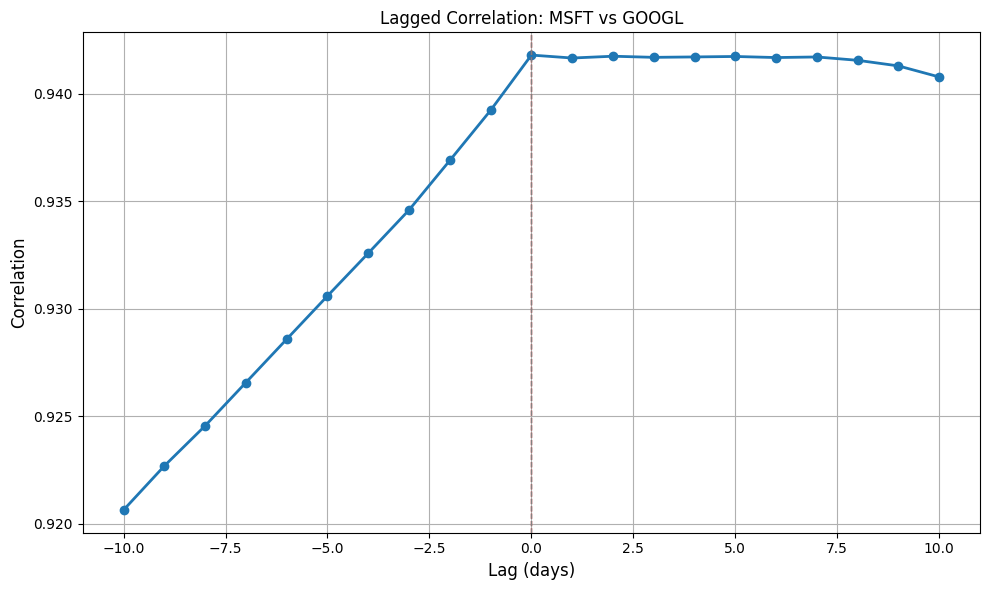

Waiting 2 seconds before next pair...

Processing pair 2/14: CVS & JNJ
Loading data for CVS
Loading data for JNJ
✅ Successfully loaded data for CVS-JNJ 


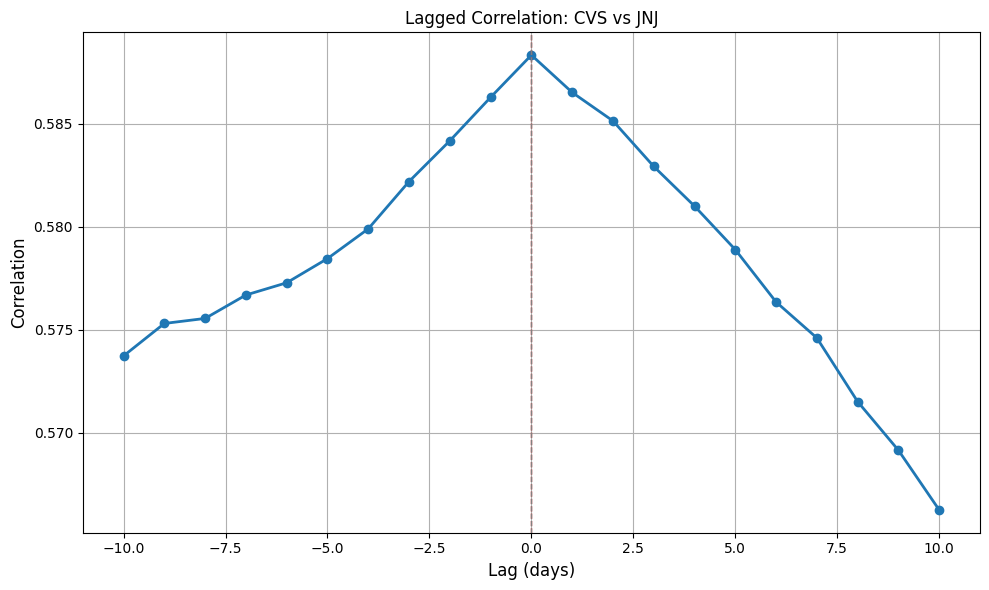

Waiting 2 seconds before next pair...

Processing pair 3/14: CL & KMB
Loading data for CL
Loading data for KMB
✅ Successfully loaded data for CL-KMB 


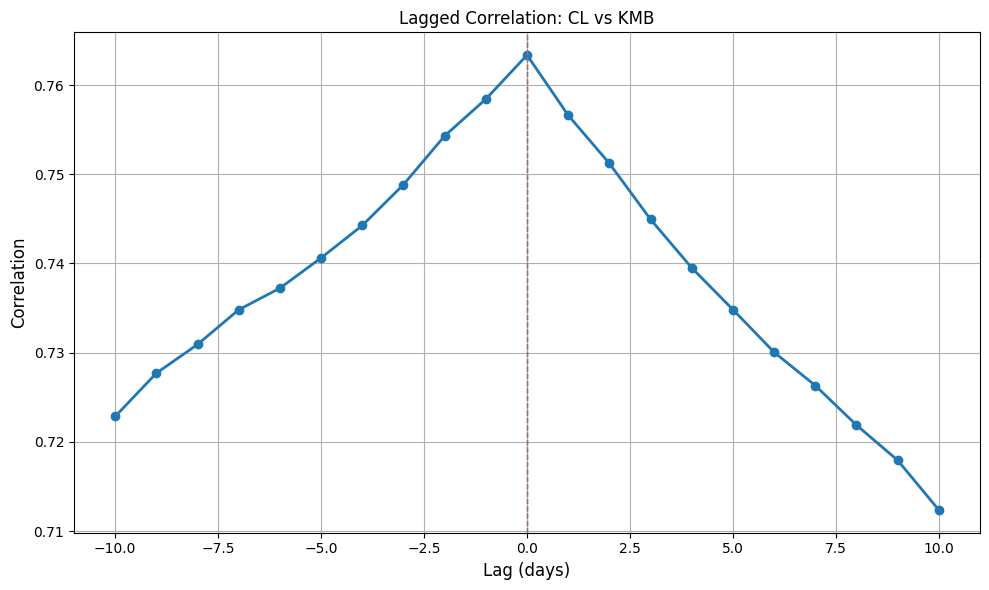

Waiting 2 seconds before next pair...

Processing pair 4/14: GE & BA
Loading data for GE
Loading data for BA
✅ Successfully loaded data for GE-BA 


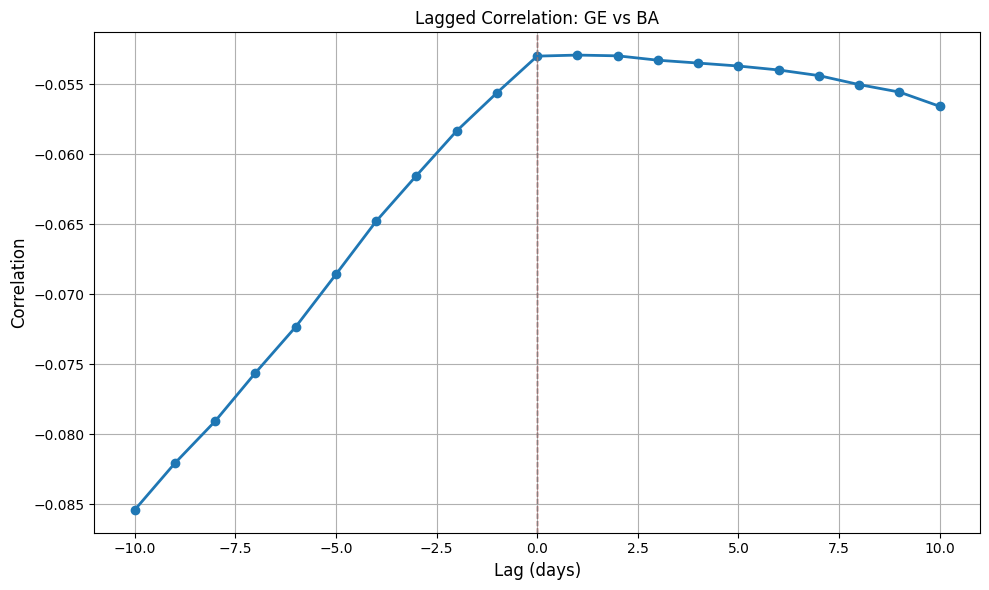

Waiting 2 seconds before next pair...

Processing pair 5/14: V & MA
Loading data for V
Loading data for MA
✅ Successfully loaded data for V-MA 


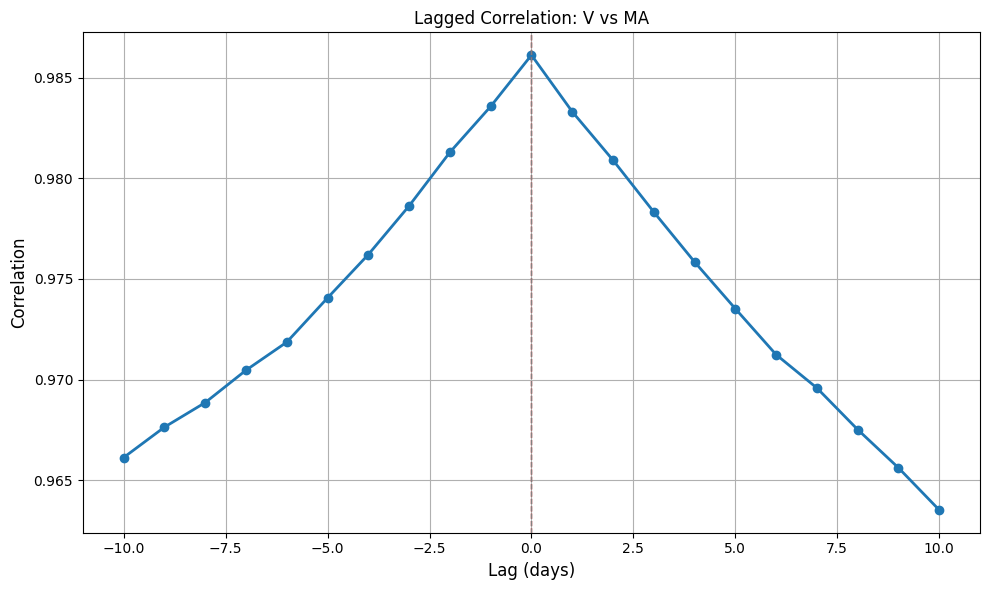

Waiting 2 seconds before next pair...

Processing pair 6/14: XOM & CVX
Loading data for XOM
Loading data for CVX
✅ Successfully loaded data for XOM-CVX 


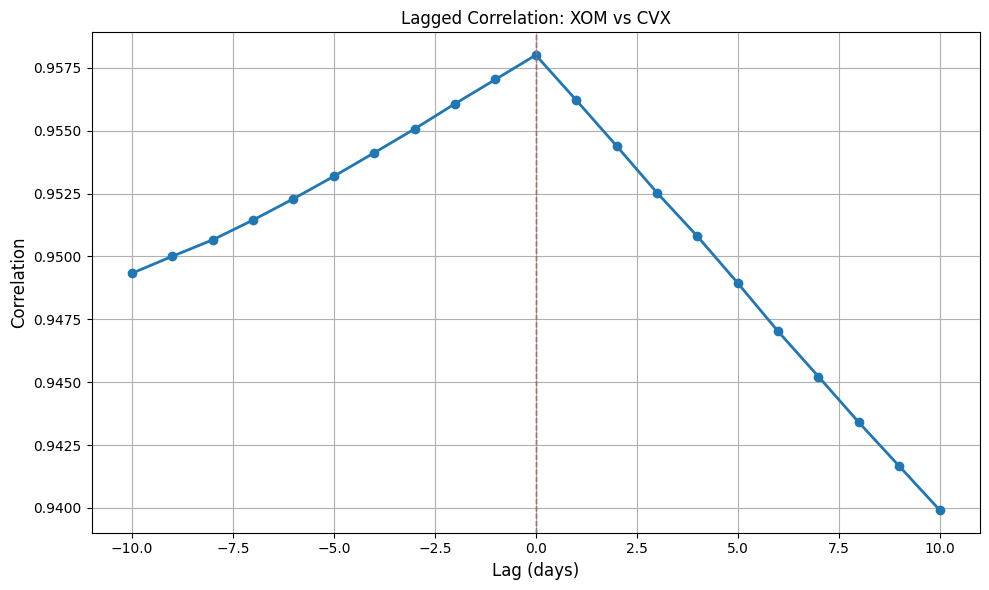

Waiting 2 seconds before next pair...

Processing pair 7/14: KO & PEP
Loading data for KO
Loading data for PEP
✅ Successfully loaded data for KO-PEP 


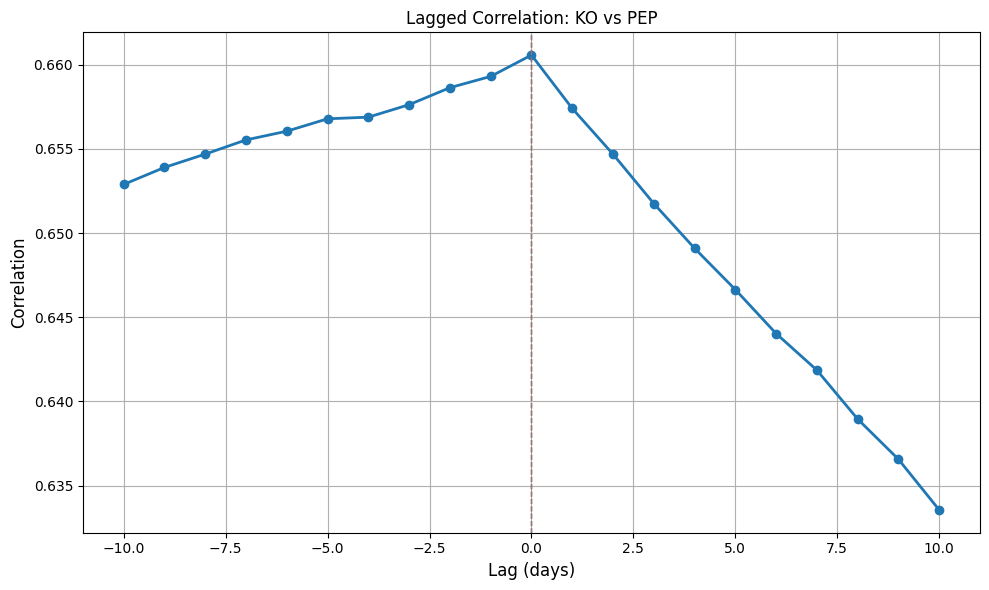

Waiting 2 seconds before next pair...

Processing pair 8/14: PFE & MRK
Loading data for PFE
Loading data for MRK
✅ Successfully loaded data for PFE-MRK 


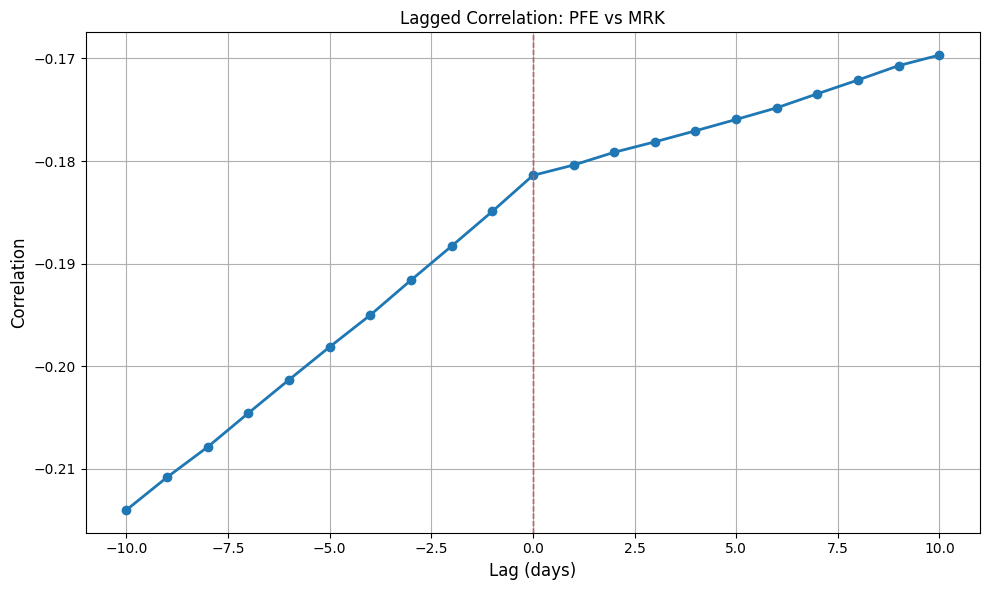

Waiting 2 seconds before next pair...

Processing pair 9/14: MS & GS
Loading data for MS
Loading data for GS
✅ Successfully loaded data for MS-GS 


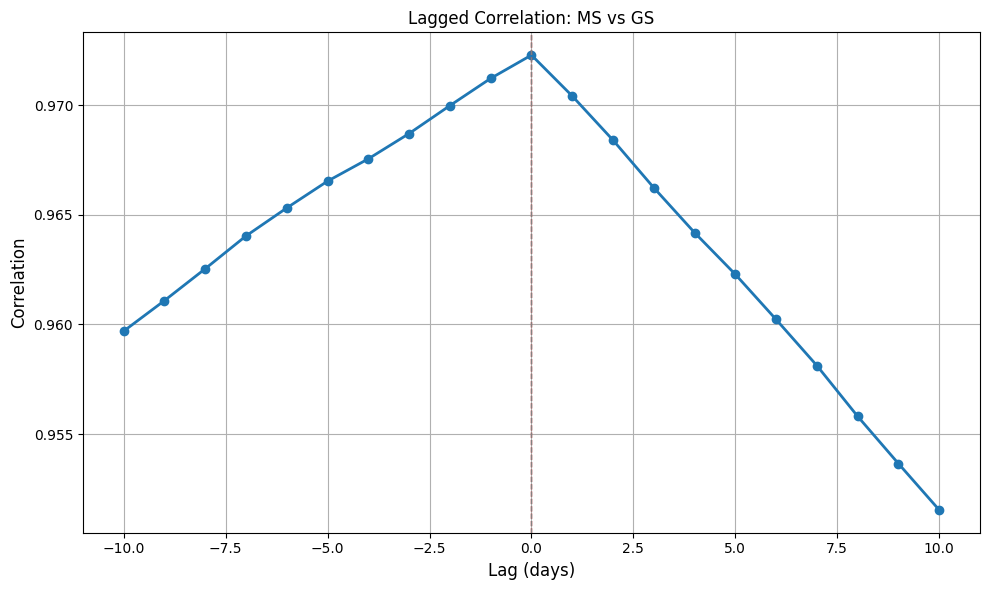

Waiting 2 seconds before next pair...

Processing pair 10/14: AMD & NVDA
Loading data for AMD
Loading data for NVDA
✅ Successfully loaded data for AMD-NVDA 


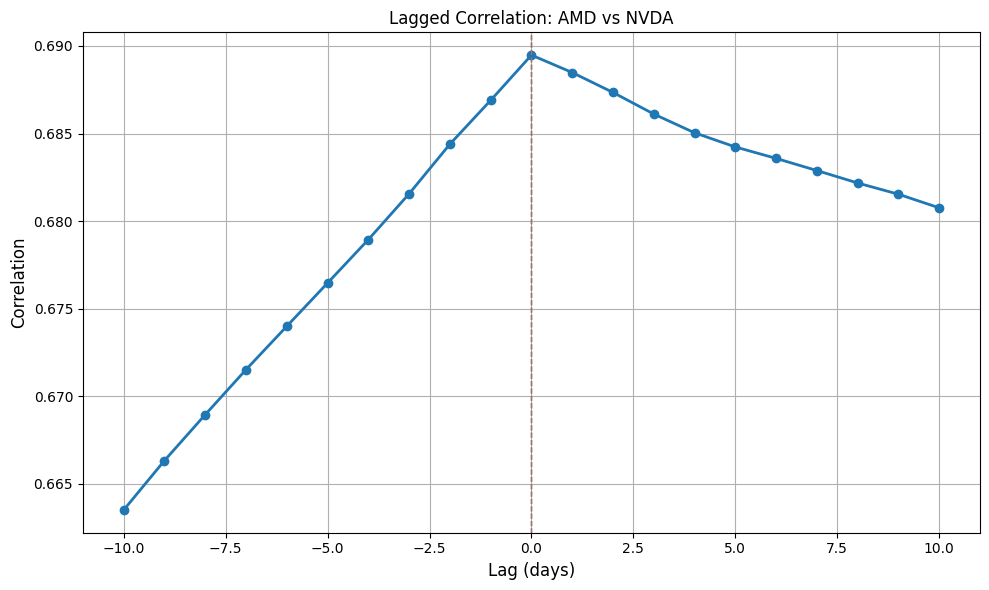

Waiting 2 seconds before next pair...

Processing pair 11/14: T & VZ
Loading data for T
Loading data for VZ
✅ Successfully loaded data for T-VZ 


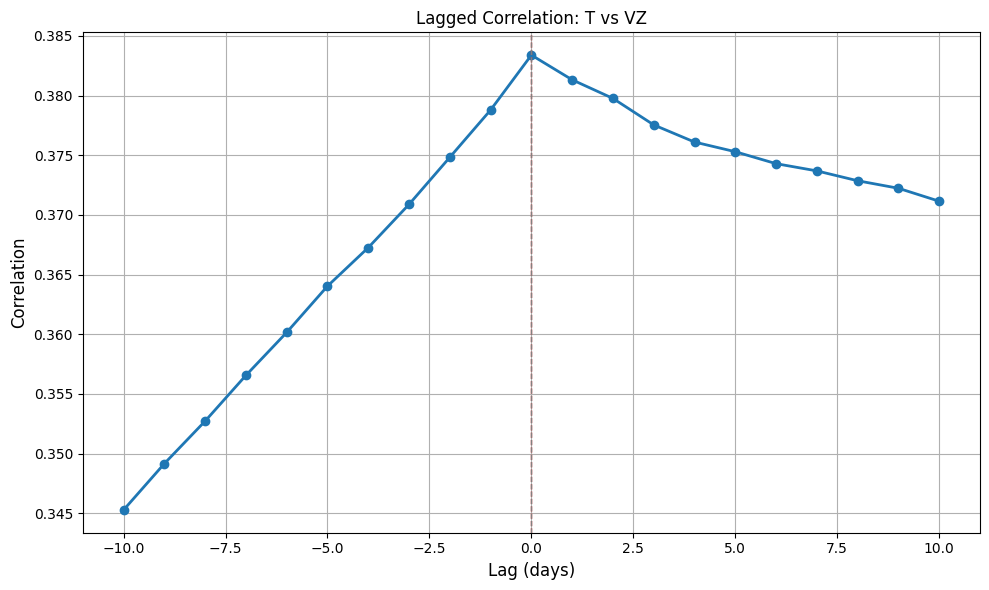

Waiting 2 seconds before next pair...

Processing pair 12/14: WMT & TGT
Loading data for WMT
Loading data for TGT
✅ Successfully loaded data for WMT-TGT 


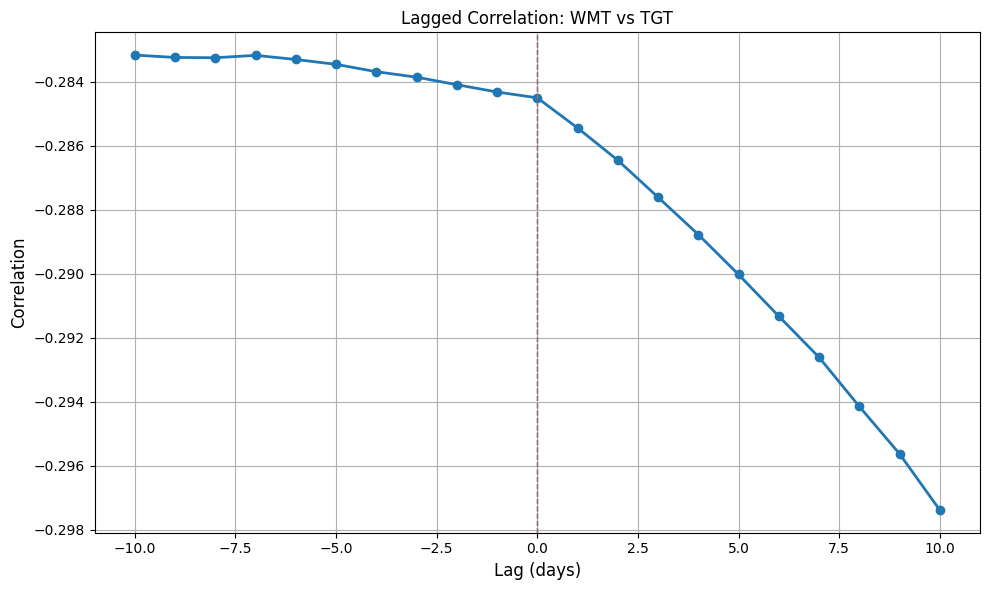

Waiting 2 seconds before next pair...

Processing pair 13/14: JPM & BAC
Loading data for JPM
Loading data for BAC
✅ Successfully loaded data for JPM-BAC 


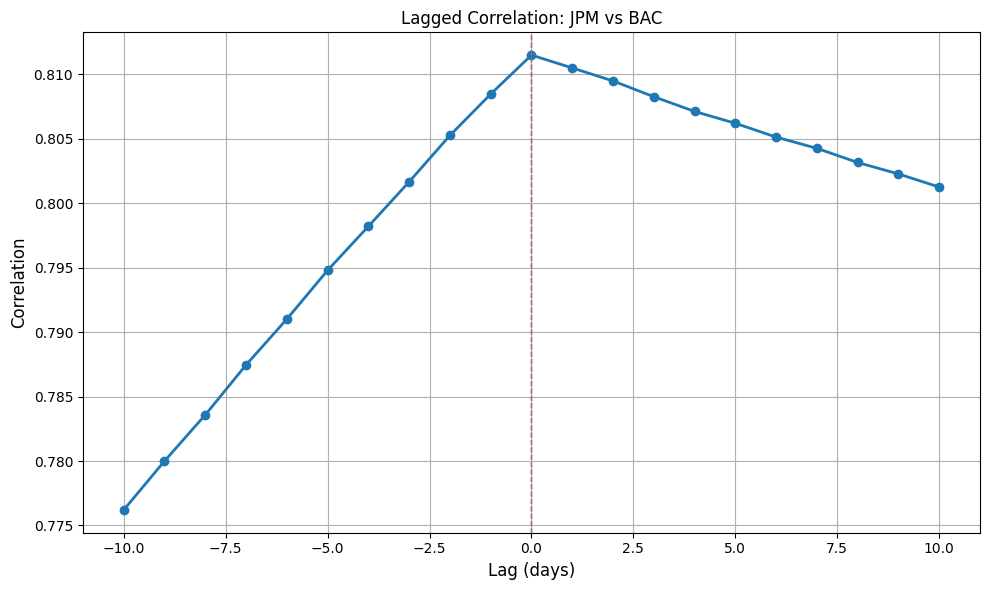

Waiting 2 seconds before next pair...

Processing pair 14/14: COST & BJ
Loading data for COST
Loading data for BJ
✅ Successfully loaded data for COST-BJ 


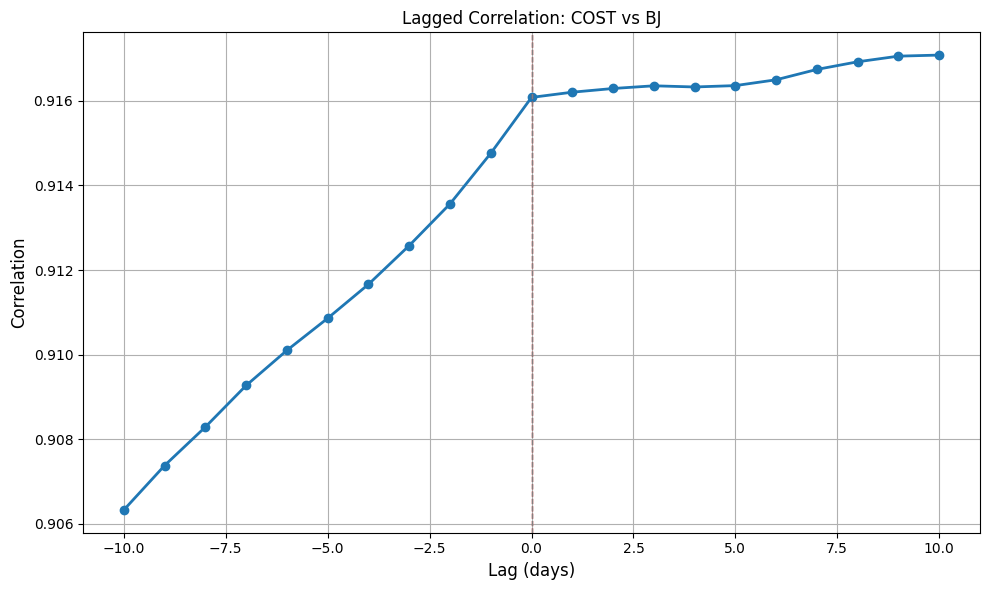

In [7]:
# Step 3: Run Correlation Analysis & Create Plots
print(f"Starting correlation analysis from {start_date} to {end_date}")
print(f"Processing {len(research_pairs)} pairs...")
success = 0

for i, (ticker_a, ticker_b) in enumerate(research_pairs, 1):
    print(f"\n{'='*50}")
    print(f"Processing pair {i}/{len(research_pairs)}: {ticker_a} & {ticker_b}")
    print(f"{'='*50}")

    try:
        df = load_pair_data(ticker_a, ticker_b, start_date, end_date, cache=True)
        if df.empty:
            print(f"❌ No data for {ticker_a} and {ticker_b}")
            continue

        print(f"✅ Successfully loaded data for {ticker_a}-{ticker_b} ")
        plot_lagged_correlation(ticker_a, ticker_b, df, max_lag=10, save=False)
        success += 1
    
    except Exception as e:
        print(f"❌ Error processing {ticker_a} and {ticker_b}: {e}")
        continue
    
    # Stagger API calls for stability
    if i < len(research_pairs):
        print("Waiting 2 seconds before next pair...")
        time.sleep(2)

In [8]:
# Step 4: Conclusion
print(f"\n{'='*50}")
print(f"Successfully processed: {success}/{len(research_pairs)} pairs")
print(f"{'='*50}")


Successfully processed: 14/14 pairs
